# NASA Confirmed Exoplanets - Data Analysis

This project will take a look at how Earth compares to the exoplanets (planets not within our solar system) confirmed by NASA in their Confirmed Exoplanets dataset, and some of the interesting potential relationships between the data collected.

Disclaimer: This project makes use of jupyter-contrib-nbextensions: Python Markdown, to allow markdown cells to communicate important variables. Sometimes this extension requires mardown cells to be re-ran individually (shift+Enter), once the variables are calculated.

## Data Collection and Preparation

In [1]:
import pandas as pd
import math as math
import numpy as np
pd.options.display.max_columns = None

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
import json

resp = requests.get('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&format=json')

nasa_discovered_exoplanets = resp.json()

fout=open("nasa_discovered_exoplanets.json", "w")
json.dump(nasa_discovered_exoplanets, fout)
fout.close

nasa_discovered_exoplanets = pd.DataFrame(nasa_discovered_exoplanets)
nasa_discovered_exoplanets

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,Kepler-138,c,Kepler-138 c,Transit,0,3,13.781300,0.000100,-0.000100,0.0,9,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,0.00620,0.00602,-0.00352,0.0,4,Mass,0.107,0.006,-0.006,0.0,9,6.2,5.8,-3.4,0.0,3,1,1,0,19h21m31.57s,+43d17m34.7s,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,-0.11,0.0,4,12.925,NaN,0.0,Kepler-band,12.472,None,0.0,3841.00,49.00,-49.00,0.0,10,0.52,0.06,-0.06,0.0,9,0.44,0.02,-0.02,0.0,11,2,2015-06-17,Kepler
1,Kepler-138,d,Kepler-138 d,Transit,0,3,23.088100,0.000900,-0.000800,0.0,7,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,0.00201,0.00212,-0.00122,0.0,3,Mass,0.108,0.007,-0.007,0.0,8,2.1,2.2,-1.2,0.0,3,1,1,0,19h21m31.57s,+43d17m34.7s,290.381547,0.000017,43.292973,0.000017,2,66.99,0.11,-0.11,0.0,4,12.925,NaN,0.0,Kepler-band,12.472,None,0.0,3841.00,49.00,-49.00,0.0,10,0.52,0.06,-0.06,0.0,9,0.44,0.02,-0.02,0.0,11,2,2015-06-17,Kepler
2,Kepler-139,b,Kepler-139 b,Transit,0,2,15.771044,0.000037,-0.000037,0.0,4,0.127,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.262,0.051,-0.051,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,18h49m34.07s,+43d53m21.7s,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,-4.26,0.0,3,12.701,NaN,0.0,Kepler-band,12.677,None,0.0,5594.00,100.00,-100.00,0.0,6,NaN,NaN,NaN,NaN,2,1.30,0.25,-0.25,0.0,6,1,2014-05-14,Kepler
3,Kepler-139,c,Kepler-139 c,Transit,0,2,157.072878,0.001720,-0.001720,0.0,4,0.586,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.302,0.062,-0.062,0.0,3,NaN,NaN,NaN,NaN,0,1,1,0,18h49m34.07s,+43d53m21.7s,282.391957,0.000017,43.889351,0.000017,2,395.45,4.26,-4.26,0.0,3,12.701,NaN,0.0,Kepler-band,12.677,None,0.0,5594.00,100.00,-100.00,0.0,6,NaN,NaN,NaN,NaN,2,1.30,0.25,-0.25,0.0,6,1,2014-05-14,Kepler
4,Kepler-140,b,Kepler-140 b,Transit,0,2,3.254270,0.000008,-0.000008,0.0,4,0.045,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,None,0.144,0.028,-0.028,0.0,3,NaN,NaN,NaN,NaN,0,0,1,0,19h09m28.67s,+46d46m05.6s,287.369468,0.000017,46.768213,0.000017,2,593.80,7.20,-7.20,0.0,3,12.996,NaN,0.0,Kepler-band,12.941,None,0.0,6077.00,136.00,-136.00,0.0,6,NaN,NaN,NaN,NaN,1,1.29,0.24,-0.24,0.0,6,1,2014-05-14,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,Kepler-1514,c,Kepler-1514 c,Transit,0,2,10.514100,NaN,NaN,0.0,2,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,None,0.118,NaN,NaN,0.0,1,NaN,NaN,NaN,0.0,0,0,1,0,19h30m30.59s,+37d51m36.5s,292.627466,0.000017,37.860133,0.000017,2,379.00,20.87,-18.36,0.0,3,11.690,NaN,0.0,Kepler-band,11.829,None,0.0,6251.00,81.98,-87.80,0.0,3,1.21,0.04,-0.04,0.0,1,1.22,0.06,-0.05,0.0,3,0,2020-09-03,Kepler
4297,Kepler-1698,b,Kepler-1698 b,Transit,0,1,1.210700,NaN,NaN,0.0,2,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,None,0.096,NaN,NaN,0.0,1,NaN,NaN,NaN,0.

In [4]:
df = nasa_discovered_exoplanets
df = df.drop(columns = ['pl_letter', 'pl_controvflag', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmaxn', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_orbincln', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radjerr2', 'pl_radjlim', 'pl_denserr2', 'pl_denslim', 'pl_densn', 'ra_str', 'dec_str', 'st_disterr2', 'st_distlim', 'st_optmaglim', 'gaia_gmaglim', 'st_tefferr2', 'st_tefflim', 'st_masserr2', 'st_masslim', 'st_raderr2', 'st_radlim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'ra_str', 'dec_str', 'ra', 'dec', 'st_decerr', 'st_posn', 'st_raerr', 'st_optmag', 'st_optmagerr', 'st_optband', 'gaia_gmag', 'gaia_gmagerr', 'pl_nnotes'], axis=1)

df = df.rename(columns = {'pl_hostname': 'Star name', 'pl_name' : 'Planet name', 'pl_discmethod' : 'Discovery method', 'pl_pnum' : 'Number of planets in the stellar system', 'pl_orbper' : 'Days in a year', 'pl_orbpererr1' : 'Days in a year error (+/-)', 'pl_orbpern' : 'Year length number of measurements', 'pl_orbeccen' : 'Eccentricity', 'pl_orbeccenerr1' : 'Eccentricity error (+/-)', 'pl_orbeccenn' : 'Eccentricity number of measurements', 'pl_bmassj' : 'Planet mass (compared to Jupiter)', 'pl_bmassjerr1' : 'Planet mass error (+/-)', 'pl_bmassn' : 'Planet mass number of measurements', 'pl_radj' : 'Planet radius (compared to Jupiter)', 'pl_radjerr1' : 'Planet radius error (+/-)', 'pl_radn' : 'Planet radius number of measurements', 'pl_dens' : 'Planet density', 'pl_denserr1' : 'Density error (+/-)', 'pl_densn' : 'Planet density number of measurements', 'st_dist' : 'Star distance (in Parsecs)', 'st_disterr1' : 'Distance error (+/-)', 'st_distn' : 'Distance number of measurements', 'st_teff' : 'Star temperature', 'st_tefferr1' : 'Temperature error (+/-)', 'st_teffn' : 'Temperature number of measurements', 'st_mass' : 'Star mass (compared to the Sun)', 'st_masserr1' : 'Star mass error (+/-)', 'st_massn' : 'Star mass number of measurements', 'st_rad' : 'Star radius (compared to the Sun)', 'st_raderr1' : 'Star radius error (+/-)', 'st_radn' : 'Star radius number of measurements', 'rowupdate' : 'Date of last update', 'pl_facility' : 'Discovery facility'})


mass_e = round((df['Planet mass (compared to Jupiter)'] / 0.0031463520), 5)
#must round mass_e to 5d.p., as this is the highest accuracy we can quote it to, given the planet masses provided are all quoted to an accuracy of 5d.p.

df.insert(13, 'Planet mass (compared to Earth)', mass_e)

year = df['Date of last update'].str.split('-').str[0].tolist()
df.insert(32, 'Year of last update', year)

df

,Star name,Planet name,Discovery method,Number of planets in the stellar system,Days in a year,Days in a year error (+/-),Year length number of measurements,Eccentricity,Eccentricity error (+/-),Eccentricity number of measurements,Planet mass (compared to Jupiter),Planet mass error (+/-),Planet mass number of measurements,Planet mass (compared to Earth),Planet radius (compared to Jupiter),Planet radius error (+/-),Planet radius number of measurements,Planet density,Density error (+/-),Star distance (in Parsecs),Distance error (+/-),Distance number of measurements,Star temperature,Temperature error (+/-),Temperature number of measurements,Star mass (compared to the Sun),Star mass error (+/-),Star mass number of measurements,Star radius (compared to the Sun),Star radius error (+/-),Star radius number of measurements,Date of last update,Year of last update,Discovery facility
0,Kepler-138,Kepler-138 c,Transit,3,13.781300,0.000100,9,NaN,NaN,3,0.00620,0.00602,4,1.97054,0.107,0.006,9,6.2,5.8,66.99,0.11,4,3841.00,49.00,10,0.52,0.06,9,0.44,0.02,11,2015-06-17,2015,Kepler
1,Kepler-138,Kepler-138 d,Transit,3,23.088100,0.000900,7,NaN,NaN,3,0.00201,0.00212,3,0.63884,0.108,0.007,8,2.1,2.2,66.99,0.11,4,3841.00,49.00,10,0.52,0.06,9,0.44,0.02,11,2015-06-17,2015,Kepler
2,Kepler-139,Kepler-139 b,Transit,2,15.771044,0.000037,4,NaN,NaN,0,NaN,NaN,0,NaN,0.262,0.051,3,NaN,NaN,395.45,4.26,3,5594.00,100.00,6,NaN,NaN,2,1.30,0.25,6,2014-05-14,2014,Kepler
3,Kepler-139,Kepler-139 c,Transit,2,157.072878,0.001720,4,NaN,NaN,0,NaN,NaN,0,NaN,0.302,0.062,3,NaN,NaN,395.45,4.26,3,5594.00,100.00,6,NaN,NaN,2,1.30,0.25,6,2014-05-14,2014,Kepler
4,Kepler-140,Kepler-140 b,Transit,2,3.254270,0.000008,4,NaN,NaN,0,NaN,NaN,0,NaN,0.144,0.028,3,NaN,NaN,593.80,7.20,3,6077.00,136.00,6,NaN,NaN,1,1.29,0.24,6,2014-05-14,2014,Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,Kepler-1514,Kepler-1514 c,Transit,2,10.514100,NaN,2,NaN,NaN,0,NaN,NaN,0,NaN,0.118,NaN,1,NaN,NaN,379.00,20.87,3,6251.00,81.98,3,1.21,0.04,1,1.22,0.06,3,2020-09-03,2020,Kepler
4297,Kepler-1698,Kepler-1698 b,Transit,1,1.210700,NaN,2,NaN,NaN,0,NaN,NaN,0,NaN,0.096,NaN,1,NaN,NaN,223.78,1.20,1,4945.83,74.17,2,NaN,NaN,0,0.74,0.02,2,2020-09-03,2020,Kepler
4298,Kepler-1699,Kepler-1699 b,Transit,1,3.490820,NaN,2,NaN,NaN,0,NaN,NaN,0,NaN,0.140,NaN,1,NaN,NaN,NaN,NaN,0,5214.40,221.45,2,NaN,NaN,0,NaN,NaN,1,2020-09-03,2020,Kepler
4299,Kepler-1700,Kepler-1700 b,Transit,1,234.239000,NaN,2,NaN,NaN,0,NaN,NaN,0,NaN,0.259,NaN,1,NaN,NaN,732.73,8.87,1,5885.00,59.00,2,NaN,NaN,0,1.14,0.01,2,2020-09-03,2020,Kepler


Here I have filtered and cleaned the dataset. With use of the [Data Column Definitions Documentation](https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html), I use the dataframe 'drop' method to delete data that may not be relevant to the analysis I want to undertake on the dataset, and at the same time give more readable names to the relevant data. Any data that appears irrelevant to the current analysis has been kept in for potential future analyses. I also created two new columns to make some data more useful for comparisons and visualisations in analysis: 'Planet mass (compared to Earth)' and 'Year of last update'.

## Data Analysis

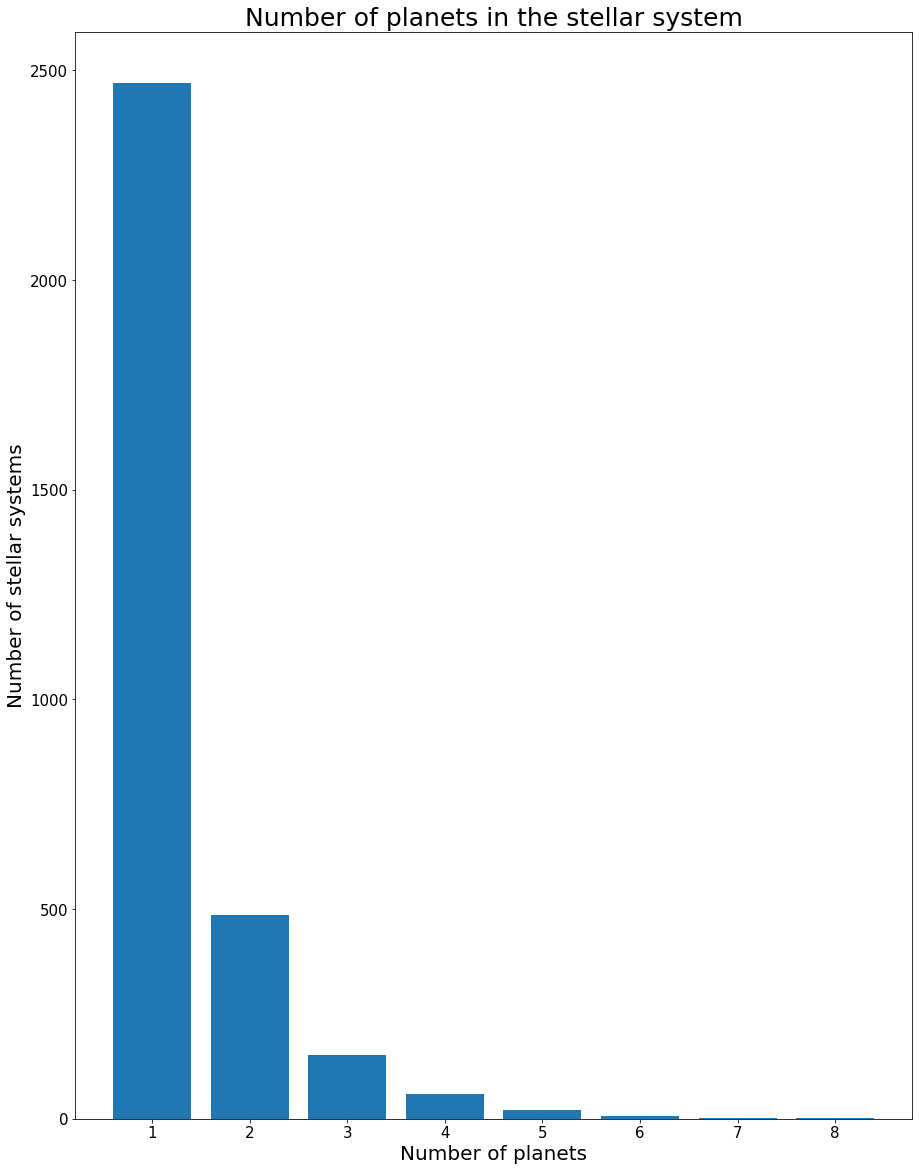

In [5]:
s2 = df.groupby(['Number of planets in the stellar system']).size()

plt.figure(figsize=(15,20))
plt.title('Number of planets in the stellar system', fontsize=25)
plt.ylabel('Number of stellar systems', fontsize=20)
plt.xlabel('Number of planets', fontsize=20)
plt.tick_params(labelsize=15)


count=s2.index.min()
index=0

for i in s2.values: #clean up required as stellar systems will be represented by multiple planets.
    i = i/count
    count = count+1

    s2.values[index] = i
    index=index+1
    
plt.bar(s2.index, s2.values)

sum = 0
for x in s2.index:
    sum += x*s2[x]
mean_planets= sum/s2.sum()


one_planet_percentage=round(s2[1]/s2.sum()*100,3)
eight_planets_integer=s2[8]
eight_planets_percentage=round(s2[8]/s2.sum()*100,3)

The above bar chart shows the number of planets per system discovered. The average number of planets in a stellar system is {{round(mean_planets, 5)}}, with {{one_planet_percentage}}% of stellar systems having just 1 planet. Interestingly, this makes our own solar system an extreme outlier. Our solar system contains 8 planets, a trait shared only by {{eight_planets_integer}} other system(s), {{eight_planets_percentage}}% of discovered stellar systems.

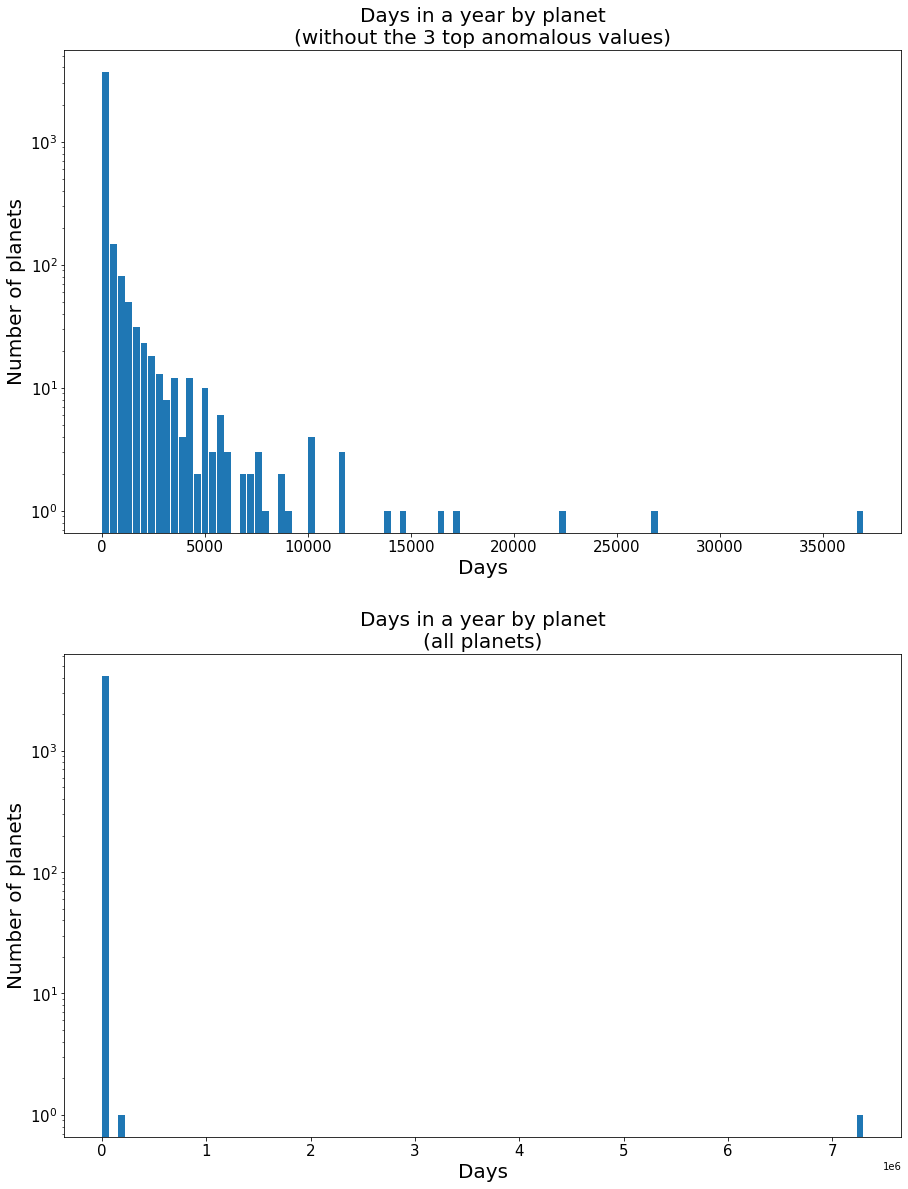

In [6]:
s3 = df['Days in a year']
s3=s3.dropna()

mean=round(s3.mean(), 6)
# print(s3.std())

largest_1 = int(s3.values[s3.values==max(s3.tolist())])
s4 = s3.drop(s3.index[s3.values==max(s3.tolist())])
largest_2 = int(s4.values[s4.values==max(s4.tolist())])
s4 = s4.drop(s4.index[s4.values==max(s4.tolist())])
largest_3 = int(s4.values[s4.values==max(s4.tolist())])
s4 = s4.drop(s4.index[s4.values==max(s4.tolist())])

new_mean=round(s4.mean(), 6)


fig, axs = plt.subplots(2)
plt.subplots_adjust(hspace=0.25)

plt.subplot(211)

plt.title('Days in a year by planet\n(without the 3 top anomalous values)', fontsize=20)
plt.ylabel('Number of planets', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.tick_params(labelsize=15)
s4.hist(bins=100, figsize=(15,20), grid=False, rwidth=0.9, log=True)

plt.subplot(212)

plt.title('Days in a year by planet\n(all planets)', fontsize=20)
plt.ylabel('Number of planets', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.tick_params(labelsize=15)
s3.hist(bins=100, figsize=(15,20), grid=False, rwidth=0.9, log=True)


## comparisons to Earth

ten_percent = 365.25/10

s_comp=s3.drop(s3.index[s3.values<365.25-ten_percent])
s_comp=s_comp.drop(s_comp.index[s_comp.values>365.25+ten_percent])

num_shorter = s3.values[s3.values<365].size
percentage_shorter = round(num_shorter/s3.size*100, 4)

num_longer = s3.values[s3.values>365].size
percentage_longer = round(num_longer/s3.size*100, 4)

The data on days in a year by planet is uniquely interesting, as there are a small number of extremely high values that skew the whole data. The three largest day counts are {{largest_1}}, {{largest_2}} and {{largest_3}}. When these extremely high values are included the average days in a year for the exoplanets of the dataset is {{mean}} days, but when these anomalies are excluded from the calculations, the average days in a year for the exoplanets is {{new_mean}} days. Therefore, to properly characterise and visualise the data, some anomalous results have been removed for one of the visualisations.

The number of planets with a similar year lenth to Earth (+/-10% of 365.25 days) is {{s_comp.size}}. {{percentage_shorter}}% of planets have shorter years than Earth, whilst {{percentage_longer}}% of planets have longer years. So, despite an Earth year being only about {{round(365.25/mean,3)}} times the average year length, an Earth year is still longer than about {{round(percentage_shorter,1)}}% of planet years.

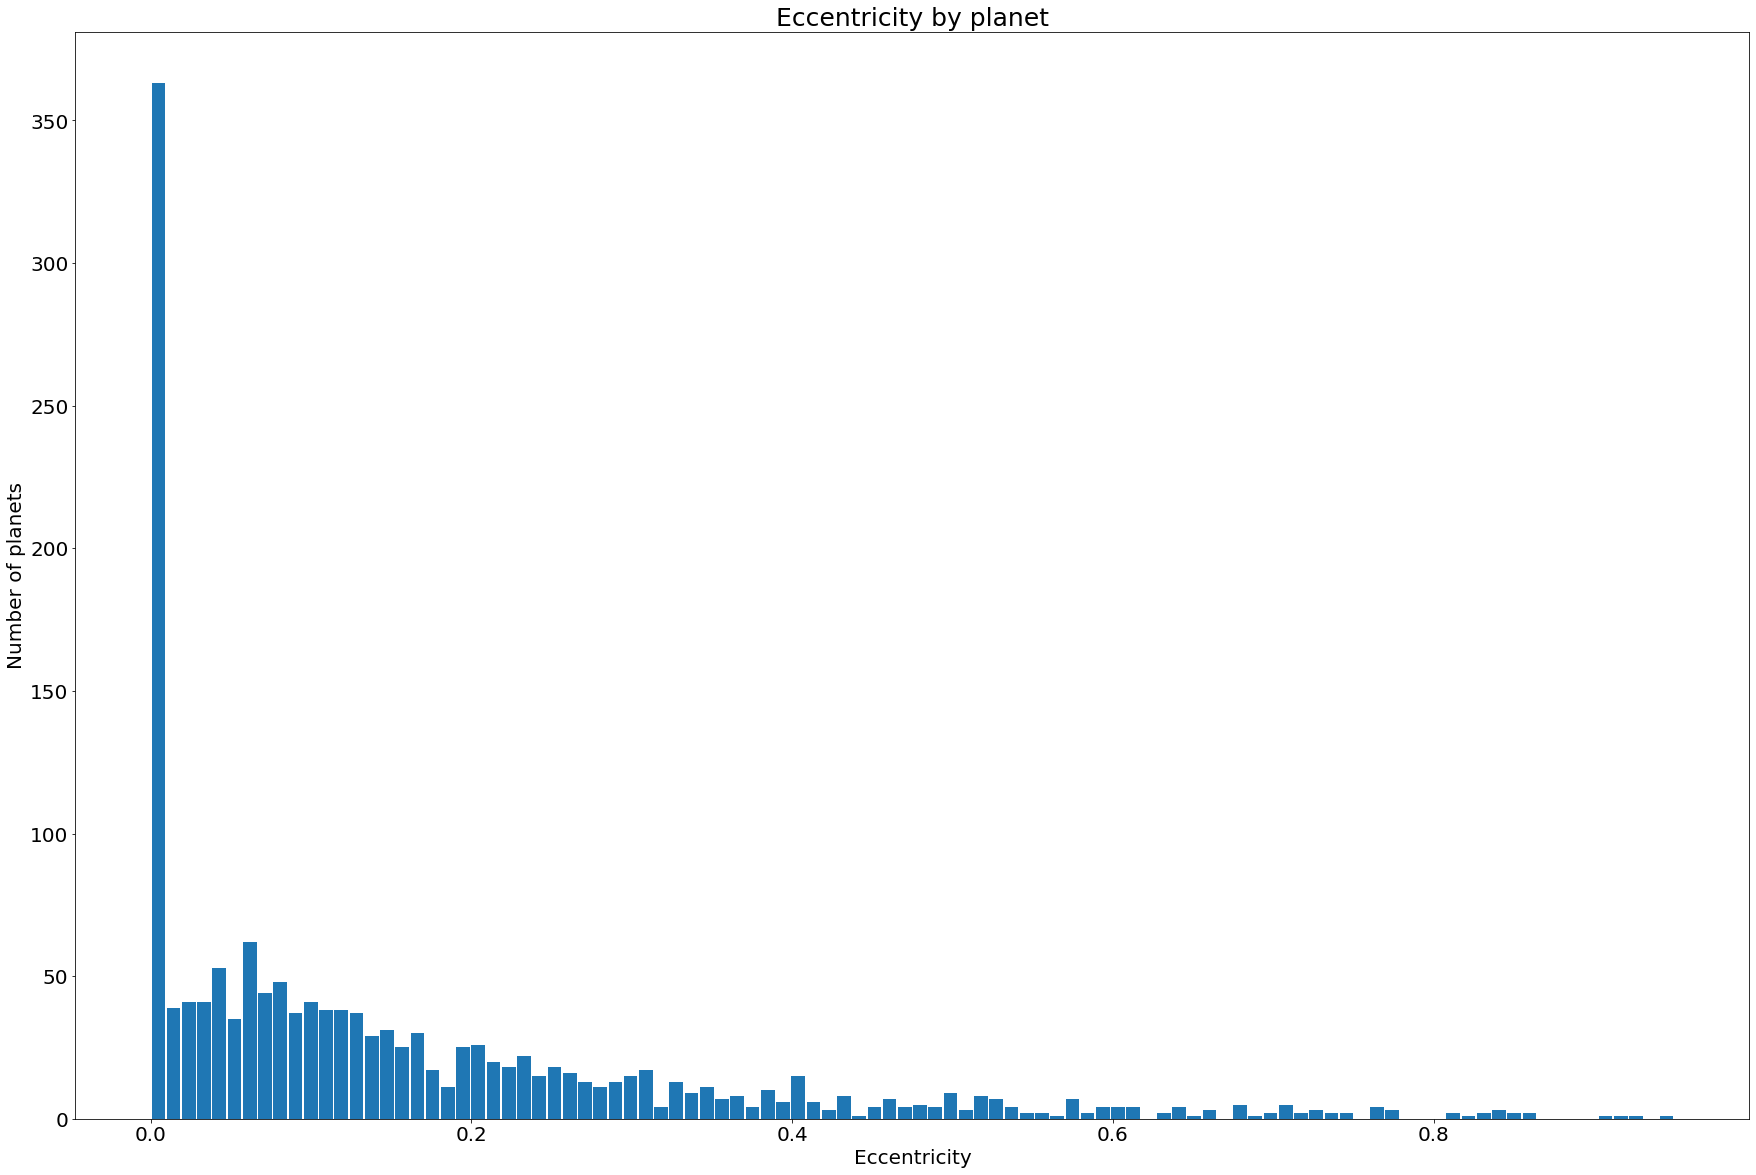

In [7]:
### Earth's eccentricity varies between 0.0034 and 0.058
s5 = df['Eccentricity']
s5=s5.dropna()

eccentricities_similar_to_earth = np.sum(s5.between(0.0034, 0.058, inclusive = True))
eccentricities_smaller_than_earth = np.sum(s5<0.00339)
eccentricities_larger_than_earth = np.sum(s5>0.0581)
eccentricities_zero = np.sum(s5.equals(0))

num_eccentricities_recorded = s5.size

percentage_similar_to_earth = round(eccentricities_similar_to_earth/num_eccentricities_recorded*100, 3)

mean_eccentricity = round(s5.mean(), 5)

plt.title('Eccentricity by planet', fontsize=25)
plt.ylabel('Number of planets', fontsize=20)
plt.xlabel('Eccentricity', fontsize=20)
plt.tick_params(labelsize=20)

s5.hist(bins=100, figsize=(30,20), grid=False, rwidth=0.9)




According to the [Wikipedia page on 'Orbital Eccentricity'](https://en.wikipedia.org/wiki/Orbital_eccentricity) the Earth's eccentricity varies between 0.0034 and 0.058 over hundreds of thousands of years. Note that eccentricity determines the amount by which an orbit around another body deviates from a perfect circle. An eccentricity of 0 implies an orbit with a perfect circle. Eccentricity has a range of 0 <= e < 1.

The average eccentricity of an exoplanet's orbit is {{mean_eccentricity}}, about {{round(mean_eccentricity/0.0580,2)}} times larger than Earth at it's 'most eccentric'. {{percentage_similar_to_earth}}% of the exoplanets have similar eccentricity in their orbit as Earth (between 0.0034 and 0.0580).

There are {{eccentricities_zero}} planets with an orbital eccentricity of 0, hence there are {{eccentricities_zero}} planets whose orbits are perfect circles.

(array([0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 8 Text major ticklabel objects>)

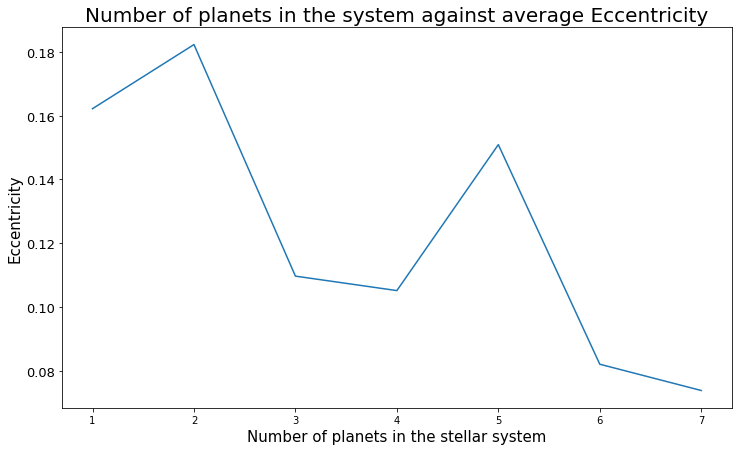

In [8]:
df.groupby(['Number of planets in the stellar system'])['Eccentricity'].mean().plot(y='Eccentricity', figsize=(12,7))

plt.title('Number of planets in the system against average Eccentricity', size=20)

plt.xlabel('Number of planets in the stellar system', size=15)
plt.ylabel('Eccentricity', size=15)

plt.xticks(size=10)
plt.yticks(size=13)

The [Wikipedia page on 'Orbital Eccentricity'](https://en.wikipedia.org/wiki/Orbital_eccentricity) also mentions that the variability of Earth's eccentricity is 'a result of gravitational attractions among the planets'. This graph attempts to visualise a possible relationship between the number of planets in a system and the orbital eccentricity of a planet in that system. Although it appears as though more planets in a system leads to a lower orbital eccentricity of planets in that system, this is not a conclusion I would be confident in drawing, as there are very few discovered planets that are in 6 and 7 planet stellar systems. There simply is not enough data to draw conclusions on this relationship.

Number of planets with similar mass to Earth (+/-10%):1772


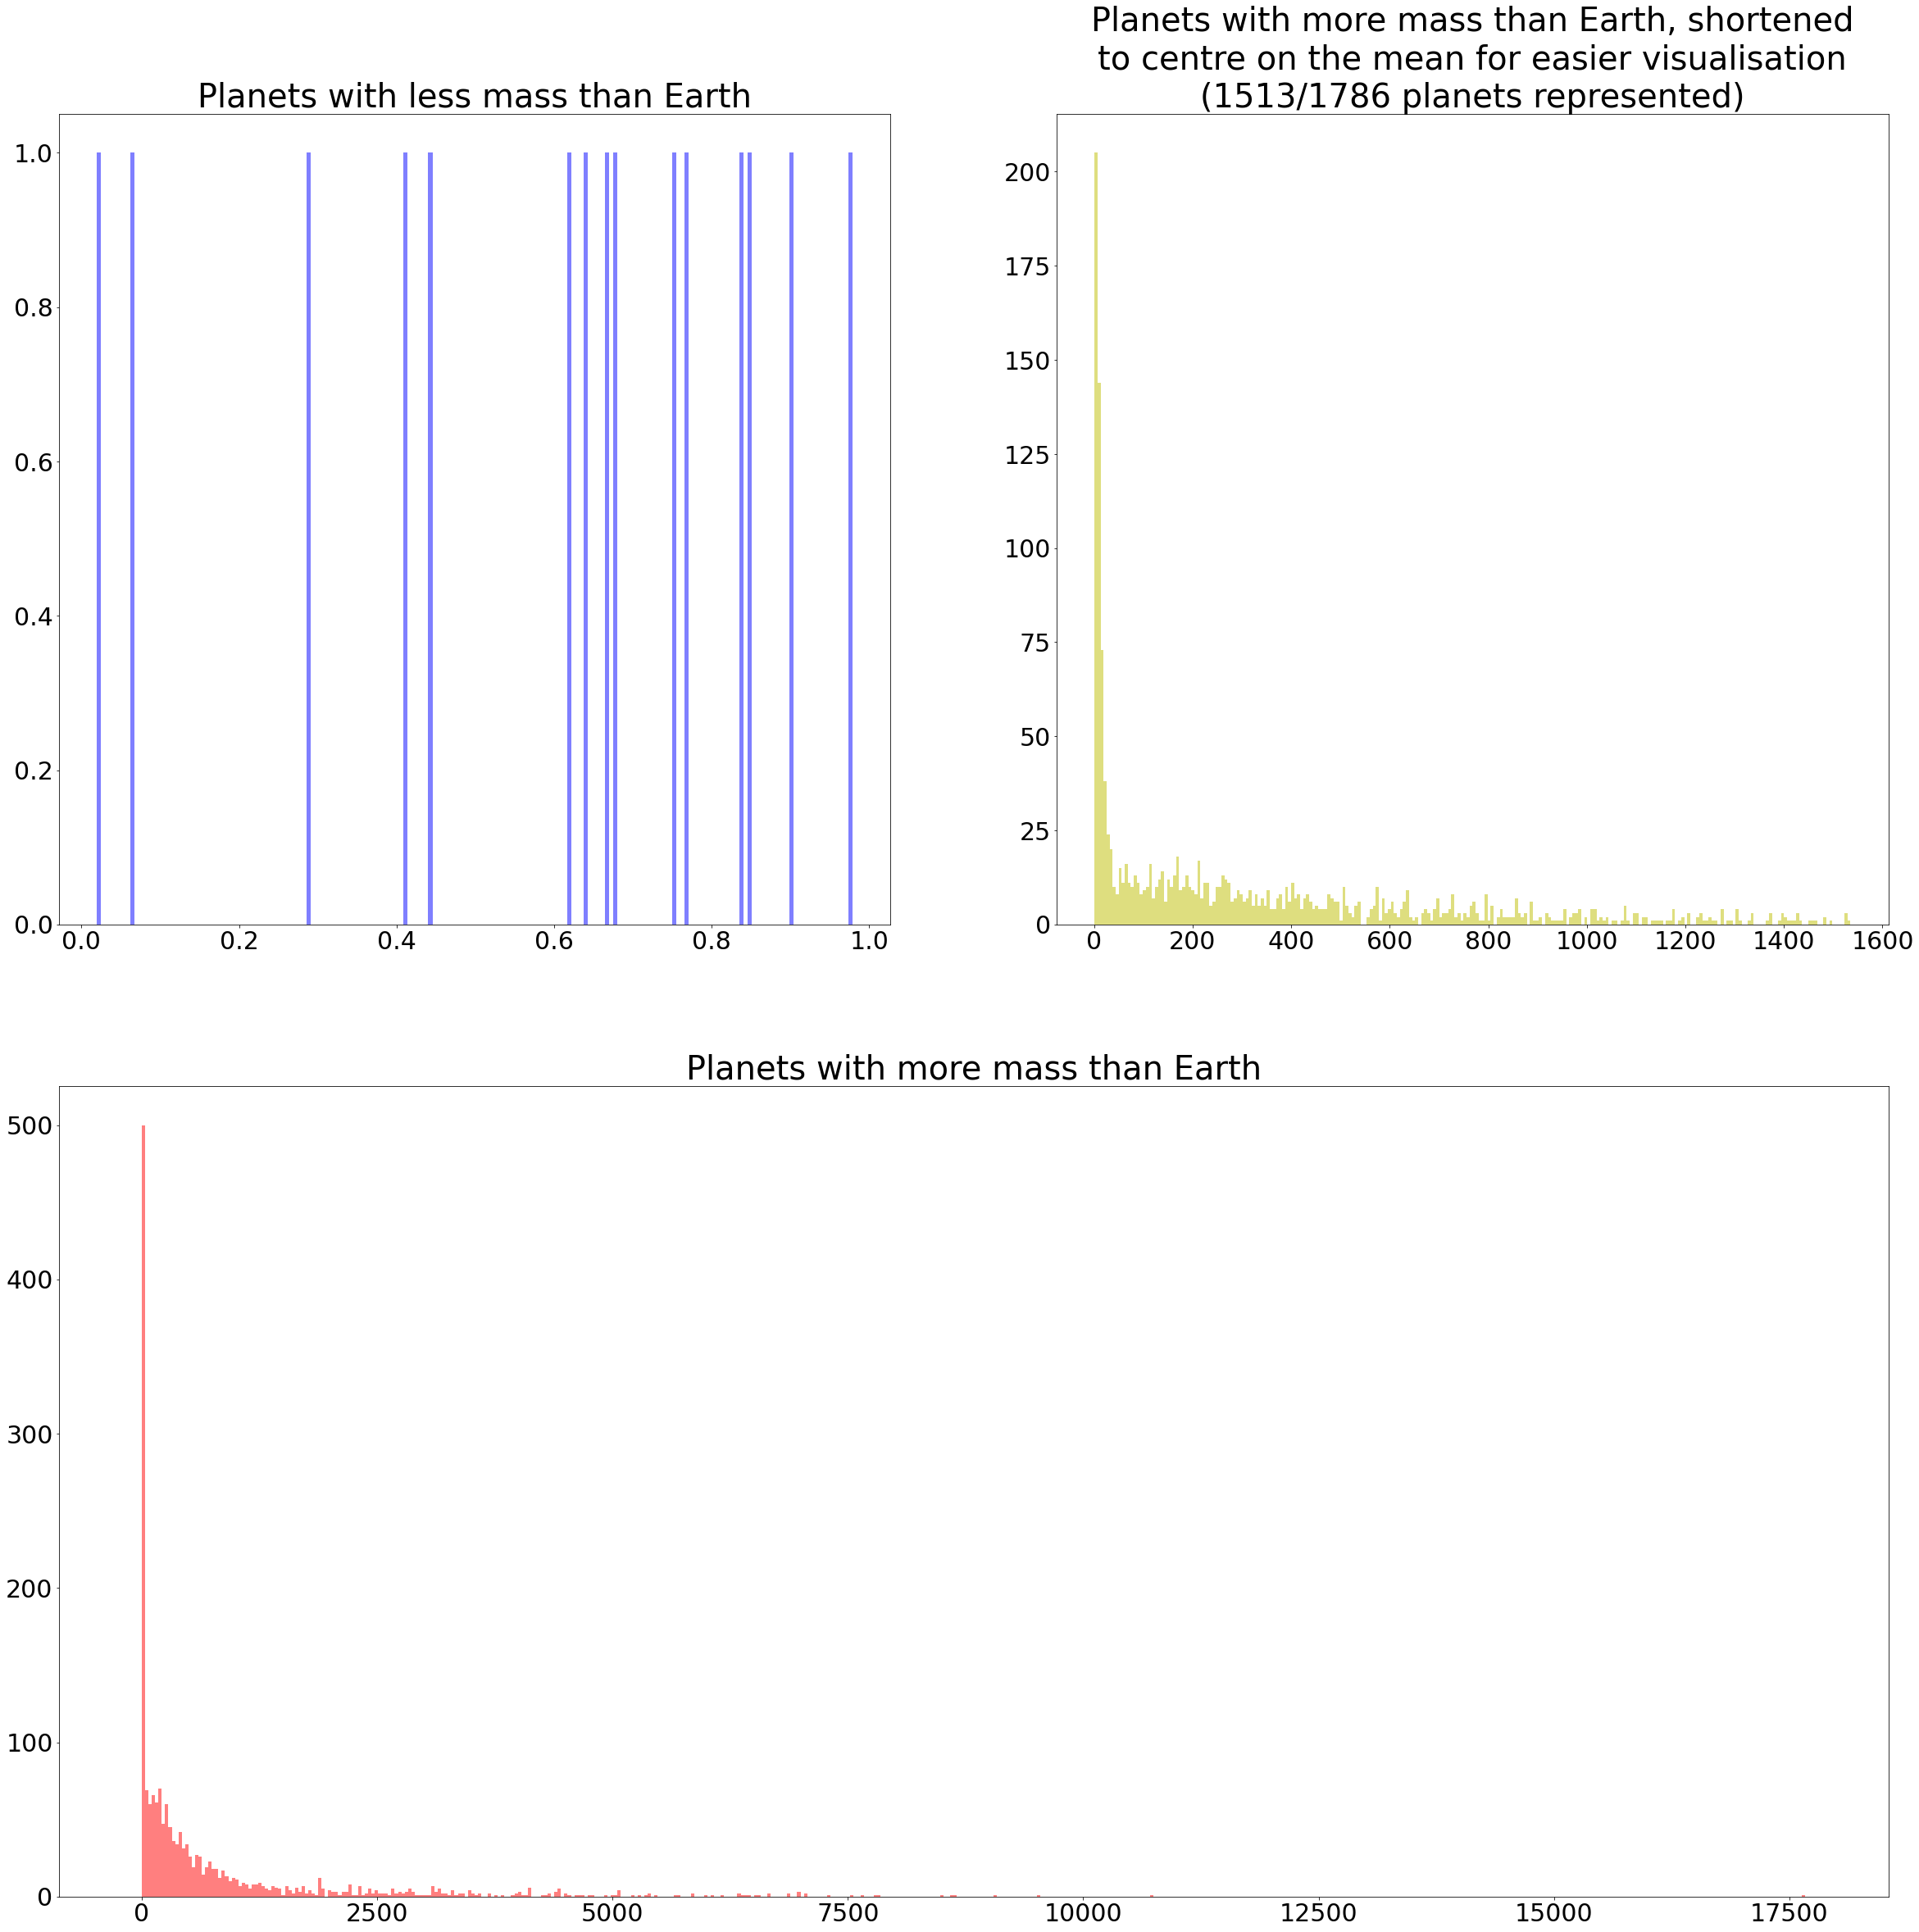

In [9]:
import matplotlib.gridspec as gridspec

s6 = df['Planet mass (compared to Earth)']

#if(s6.values.notnull):
s6=s6.dropna()
mean=round(s6.mean(), 5)

s7=s6.drop(s6.index[s6.values>1])
s8=s6.drop(s6.index[s6.values<1])

s9=s8.drop(s8.index[s8.values>(s6.mean()*2)])


# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(40,40))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
ax.set_title('Planets with less mass than Earth', fontsize=40) #title
ax.tick_params(labelsize=30) #labelsize

plt.hist(s7.values, 180, alpha = 0.5, color = ('b'))

ax = plt.subplot(gs[0, 1]) # row 0, col 1
ax.set_title('Planets with more mass than Earth, shortened\nto centre on the mean for easier visualisation\n('+str(s9.size)+'/'+str(s6.size)+' planets represented)', fontsize=40) #title
ax.tick_params(labelsize=30) #labelsize

plt.hist(s9, 250, alpha = 0.5, color = 'y')

ax = plt.subplot(gs[1, :]) # row 1, span all columns
ax.set_title('Planets with more mass than Earth', fontsize=40) #title
ax.tick_params(labelsize=30) #labelsize

plt.hist(s8, 500, alpha = 0.5, color = 'r')

s10=s6.drop(s6.index[s6.values>1.1])
s10=s6.drop(s6.index[s6.values<0.9])
print('Number of planets with similar mass to Earth (+/-10%):' + str(s10.size))

s11=s6.drop(s6.index[s6.values>=3.5])
habitable_gravity = s11.size

plt.show()

The average mass of planets in the dataset is {{mean}} times the size of mass on Earth.

Out of the three measurements of 'size': mass, radius and density, I am particularly interested in mass, as the mass of a planet is the only thing that indicates the magnitude of gravity a human would experience on the planet. 

[An article from Science Alert](https://www.sciencealert.com/limits-gravity-human-body-endurance-exoplanets) claims researchers believe a reasonable upper limit of gravity for any planet humans could visit would be between 3 and 4 times that of Earth's (1g). For the sake of this inquiry we'll use 3.5g as an upper limit.

With this in mind, there are a total of just {{habitable_gravity}} planets that humans could feasibly walk on, just {{round( habitable_gravity/s6.size*100 , 5)}}% of the recorded exoplanets planets.

In [10]:
s12=df['Star distance (in Parsecs)']
s12=s12.dropna()

#speed of light = 299 792 458 m/s
#81.5 - 18 years in seconds (life expectancy Ireland - adult age) = 63.5 years in seconds = 2,002,536,000 s
#one parsec in metres = 3.0857x10^16 m

max_distance_metres = 299792458 * 2002536000
max_distance_parsecs = max_distance_metres / (3.0857 *(10**16))

reachable_planets=s12.drop(s12.index[s12.values>=max_distance_parsecs])
reachable_planets_percentage= round(reachable_planets.size/s12.size*100, 2)

This is an inquiry into which discovered exoplanets a human could possibly travel to in their lifetime. This is purely theoretical and assumes that the human can travel at maximum speed, the speed of light. It is assumed also that life expectancy is 81.5 (the average life expectancy of an Irish person, [ref](https://www.worldlifeexpectancy.com/ireland-life-expectancy)) and that one can only travel into space once they're 18.

The number of 'reachable' exoplanets in a lifetime is {{reachable_planets.size}}, {{reachable_planets_percentage}}% of discovered planets.

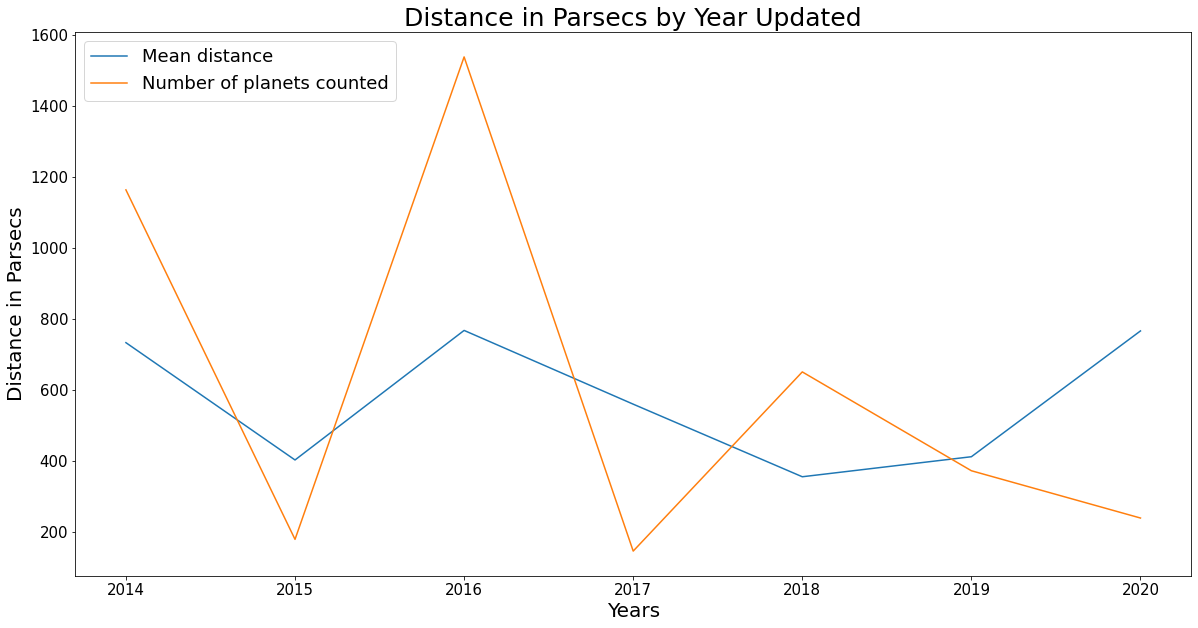

In [11]:
s12=df['Star distance (in Parsecs)']
s13=df['Year of last update']

s14=df['Star distance (in Parsecs)']
s14.set_index=df['Year of last update'].values

s15 = df.groupby(df['Year of last update'])['Star distance (in Parsecs)'].agg(['mean'])
s16 = df.groupby(df['Year of last update'])['Star distance (in Parsecs)'].agg(['count'])
    

plt.figure(figsize=(20,10))
plt.title('Distance in Parsecs by Year Updated', fontsize=25)
plt.ylabel('Distance in Parsecs', fontsize=20)
plt.xlabel('Years', fontsize=20)

plt.tick_params(labelsize=15) #labelsize

plt.plot(s15, label='Mean distance')
plt.plot(s16, label='Number of planets counted')
plt.legend(loc="upper left", prop={'size': 18})

The above graph visualises the relationship between the year the planet was updated in the dataset and it's star's distance from us. One could imagine logically that each year that goes by we discover planets that are further and further away. The blue line shows that the mean distance of planets discovered does not seem to increase over time. There is something of a noticeable relationship between the mean distance and the number of planets counted, inferring that more planets discovered does mean planets further away will be discovered. However, there is no indication that we are discovering planets further away as time goes on.

## Summary and Further Analysis

In summary, we have gained much insight into how Earth 'stacks up' to exoplanets discovered so far.


Incredibly, Earth is 1 of just {{eight_planets_integer+1}} known planets inhabiting systems of eight planets. 

Whilst Earth years are very short compared to an average planet year, our years are still in the top {{round(percentage_longer)}}% of known planet year lengths.

The eccentricity of Earth's orbit is similar to {{percentage_similar_to_earth}}% of exoplanets, {{eccentricities_zero}} of which have a perfectly circular orbit. But our planet's eccentricity is roughly {{round(mean_eccentricity/0.0580,2)}} times smaller than the average planet, so we're closer to perfect than most!

From the analysed mass data I have deducted that humans could only feasibly walk around on just {{round( habitable_gravity/s6.size*100 , 5)}}% of the discovered exoplanets, assuming they were protected from all external forces other than gravity.

From data on the star distances in Parsecs, and theoretical data on human life expectancy and light speed travel, I have found that theoretically {{reachable_planets_percentage}}% of the discovered planets are reachable in a human's lifetime.

As for further analysis, there is plenty that could be done with the rest of the available data. For example the range of error allowed by each discovery station, to deduce which gives the most accurate measurements, or which discovery method provides the most discoveries. More enquires could also be done into the similarities between our Sun and the stars of the discovered exoplanets.